<a href="https://colab.research.google.com/github/manuelrpineroj/Proyectos-Data-Science-IA/blob/main/Proyecto_cifar10_best_defipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## 1. Librerias

Para empezar carguemos esas librerias que nos hacen falta

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
pd.set_option('max_colwidth', None)
import os

from tensorflow import keras as ks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import time
import datetime

## 2. Arquitectura de red del modelo


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Nos bajamos el modelo vgg16
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model


In [ ]:
# Modelo vgg16
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
#include_top=False pq no quiero  la capa densa final que me clasifica, ese top es la capa final
#weights ='imagenet' es una red preentrenada con imagenet, que es un dataset con 1000 categorias, por tanto nos viene bien

vgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Añadimos capa de Flatten y densa al finalde la vgg

#Al output de la ultima capa de vgg le aplicamos Flatten
output = vgg.layers[-1].output
new_output_layer = ks.layers.Flatten()(output)

#Definimos vgg_model con la entrada la de vgg, y como salida la nueva capa de salida Flatten
vgg_model = Model(vgg.input, new_output_layer)
vgg_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Así puedo ver si cada capa es entrenable o no
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
display(pd.DataFrame(layers, columns=['Tipo capa', 'Nombre capa', 'Entrenable?']))

#Así veo si el modelo es entrenable
display(vgg_model.trainable)

,Tipo capa,Nombre capa,Entrenable?
0,"<InputLayer name=input_layer, built=True>",input_layer,True
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,True
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,True
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,True
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,True
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,True
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,True
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,True
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,True
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,True


True

In [ ]:
# No congelo todas las capas,descongelo las finales para que los pesos se entrenen

vgg_model.trainable = True

#A partir de la capa black4_poolincluida  se activa el entrenamiento
trainable = False
for layer in vgg_model.layers:
  if layer.name =='block1_conv2':
    trainable =True

  layer.trainable = trainable

In [ ]:
#Vemos que capas ahora son entrenables
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
display(pd.DataFrame(layers, columns=['Tipo capa', 'Nombre capa', 'Entrenable?']))

display(vgg_model.trainable)

,Tipo capa,Nombre capa,Entrenable?
0,"<InputLayer name=input_layer, built=True>",input_layer,False
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,False
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,True
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,True
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,True
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,True
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,True
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,True
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,True
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,True


True

In [ ]:
input_shape = vgg_model.output_shape
print(input_shape)

(None, 512)


In [ ]:
#Arquitectura del modelo
model = ks.Sequential()
model.add(vgg_model)
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.35))

model.add(ks.layers.Dense(128, activation='relu', input_shape=(512,)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.40))

model.add(ks.layers.Dense(256, activation='relu'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.40))
model.add(ks.layers.Dense(10, activation='softmax'))

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional (Functional)              │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,819,530 (56.53 MB)

 Trainable params: 14,815,946 (56.52 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [ ]:
"""model = ks.Sequential()

model.add(ks.layers.Conv2D(16, (5, 5), strides=1, activation='relu',
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))


model.add(ks.layers.Conv2D(32, (5, 5), strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))


model.add(ks.layers.Conv2D(64, (5, 5), strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))


model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dropout(0.5))

model.add(ks.layers.Dense(256, activation='relu'))
model.add(ks.layers.Dropout(0.5))



model.add(ks.layers.Dense(10, activation='softmax'))"""

"model = ks.Sequential()\n\nmodel.add(ks.layers.Conv2D(16, (5, 5), strides=1, activation='relu',\n                           padding='same', input_shape=(32,32,3)))\nmodel.add(ks.layers.MaxPooling2D((2, 2)))\nmodel.add(ks.layers.Dropout(0.2))\n\n\nmodel.add(ks.layers.Conv2D(32, (5, 5), strides=1, activation='relu', padding='same'))\nmodel.add(ks.layers.MaxPooling2D((2, 2)))\nmodel.add(ks.layers.Dropout(0.2))\n\n\nmodel.add(ks.layers.Conv2D(64, (5, 5), strides=1, activation='relu', padding='same'))\nmodel.add(ks.layers.MaxPooling2D((2, 2)))\nmodel.add(ks.layers.Dropout(0.2))\n\n\nmodel.add(ks.layers.Flatten())\nmodel.add(ks.layers.Dense(128, activation='relu'))\nmodel.add(ks.layers.Dropout(0.5))\n\nmodel.add(ks.layers.Dense(256, activation='relu'))\nmodel.add(ks.layers.Dropout(0.5))\n\n\n\nmodel.add(ks.layers.Dense(10, activation='softmax'))"

Para revisar un modelo, nos basta con llamar al método **.summary()** del modelo

## 3. Optimizador, función error


In [ ]:
model.compile(ks.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.compile(
    optimizer=ks.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


## 4. Preparamos los datos

Cargamos los datos de CIFAR10 de los datasets directamente de las librerias de Keras. Estos ya estan dispuestos en train and test

**Detalle importante:**
> La red neuronal requiere que los inputs sean números reales, y lo haremos forzando la division de los valores de dentro de las matrices 28x28 (que tienen valoress del 0 al 255) por 255.0 (un real)

In [ ]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train_label = y_train

#y_test = ks.utils.to_categorical(y_test)
#y_train = ks.utils.to_categorical(y_train)

y_test
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Obtenemos un array con todas las labels de CIFAR10

In [ ]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Pintemos una muestra de las imagenes del dataset CIFAR10, a ver si se parece en algo a lo que esperamos.
Primero, vemos que tipos de datos tengo, después mapeamos esas matrices en una escala de grises utilizando el método **.get_cmap()** de PlotLy con los nueve primeros números del dataset.

Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


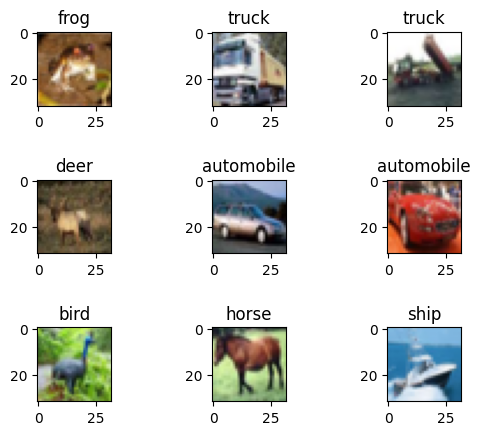

In [ ]:
# Pintemos una muestra de las las imagenes del dataset MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i]])

plt.subplots_adjust(hspace = 1)
plt.show()

Como vamos a querer ir haciendo validación a la vez que entrenamos (muy practico)

In [ ]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


Cuando añadimos convoluciones, necesitamos "pre-tratar los datos", porque **la convolución espera una matriz de 4 campos** (más parecido a "imagenes"), en el caso de MNIST. CIFAR10 ya tiene el shape adecuado, así que no tenemos que hacer nada, pero como siempre decimos: es mejor que comprobeis su tamaño.

Por eso, al salir de la Convolution, hay que hacer un Flatten, porque las capas FullDense esperan arrays, no matrices!!

Luego lo imprimimos para ver que todo está correcto

In [ ]:
# Validamos el resultado
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000,)
Test: X=(10000, 32, 32, 3), y=(10000,)
Validation: X=(10000, 32, 32, 3), y=(10000,)


## 5. Entrenamiento

Ya podemos ponernos a entrenar el modelo!! Ojo, que hemos de entrenar contra los datos convertidos al formato que espera la Convolution.

Empezaremos con 30 epocs, es decir, 30 pasadas completas del dataset (que a su vez sera con mini-batches internamente), fijando un batch de 64

El metodo .fit() nos permite, definir además si disponemos de varias CPUs, GPUs, y si queremos ir validando datos a cada fin de epoch.

In [ ]:
#Data Augmenation

#Defino las transformaciones que ocurrirán en las fotos
train_datagen = ImageDataGenerator(
    #rescale=1./255,   #esto es la normalización que hacemos siempre
    #los valores de abajo son valores máximos para cada transformación
    rotation_range=25,  #la imagen se puede rotar un máximo de 50 grados
    shear_range=0.05,  # estiramiento asimétrico, esquina super derecha a un lado y esquina inferior izq a otro
    zoom_range=0.1,
    width_shift_range=0.05, #estiramiento simétrico a lo ancho
    height_shift_range=0.05, #estiramiento simétrico a lo alto
    fill_mode='nearest', #como se rellenan los pixeles faltantes(con los mas cercanos) Al hacer algunas transformaciones se generan pixeles faltantes

    horizontal_flip=True,  # Volteo horizontal
    #vertical_flip=True,    # Volteo vertical

    channel_shift_range=0.3  # Cambia los valores de los canales RGB
)


#Creo el generador de imágenes y etiquetas
train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=16 #nº de imágenes que transforma a la vez (va a transformar todas las fotos pero en paquetes de 50)
)




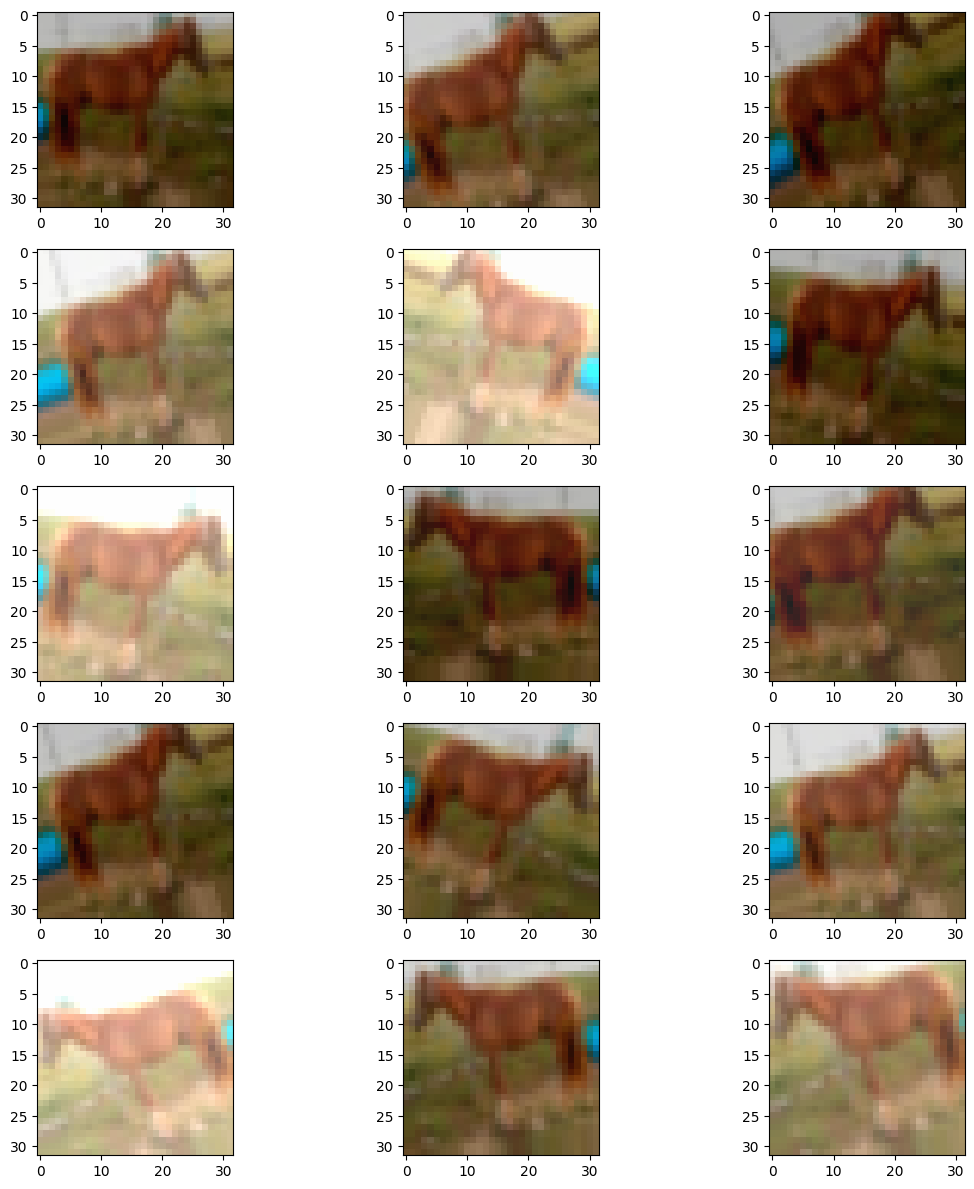

In [ ]:
#Ejemplo de transformaciones que se hacen en una foto
# Me pinta una imagen aleatoria con transformaciones para comprobar que están bien las transformaciones
sample = random.choice(range(0,4999))

example_generator = train_datagen.flow(
    x_train[sample:sample+1],
    y_train[sample:sample+1],
    batch_size=1
)

plt.figure(figsize=(12, 12))
for i in range(0,15):
  plt.subplot(5, 3, i+1)
  for X,y in example_generator:
    image = X[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback_loss = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

In [ ]:
reduce_lr = ks.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-8, restore_best_weights=True
)

In [ ]:
t = time.perf_counter()

In [ ]:
# Usando también data aumentation
history = model.fit(train_generator,
                    epochs=2000,
                    validation_data=(x_val, y_val), batch_size=256,
                    callbacks=[callback_loss, callback_accuracy, reduce_lr]
                 )

Epoch 1/2000


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.1570 - loss: 2.4805 - val_accuracy: 0.1519 - val_loss: 2.3717 - learning_rate: 0.0010
Epoch 2/2000
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.1972 - loss: 1.9886 - val_accuracy: 0.2188 - val_loss: 1.9583 - learning_rate: 0.0010
Epoch 3/2000
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.2073 - loss: 1.9455 - val_accuracy: 0.2067 - val_loss: 2.0429 - learning_rate: 0.0010
Epoch 4/2000
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.2354 - loss: 1.8829 - val_accuracy: 0.3077 - val_loss: 1.6939 - learning_rate: 0.0010
Epoch 5/2000
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.2748 - loss: 1.8144 - val_accuracy: 0.3418 - val_loss: 1.5567 - learning_rate: 0.0010
Epoch 6/2000
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.2987 - loss: 1.7535 - val_accuracy: 0.3972 - val_loss: 1.5097 - learning_rate: 0.0010
Epoch 7/2000
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accur

In [ ]:
"""history = model.fit(x_train, y_train, epochs=2000,batch_size= 512,
                    validation_data=(x_val, y_val), callbacks=[callback_loss, callback_accuracy])"""

'history = model.fit(x_train, y_train, epochs=2000,batch_size= 512,\n                    validation_data=(x_val, y_val), callbacks=[callback_loss, callback_accuracy])'

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:31:15.353815


## 6. Evaluamos los resultados

Obtengamos una grafica de como el error y la accuracy van evolucionando en cada epoch en los datos de entrenamiento y en la validación

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 90.330


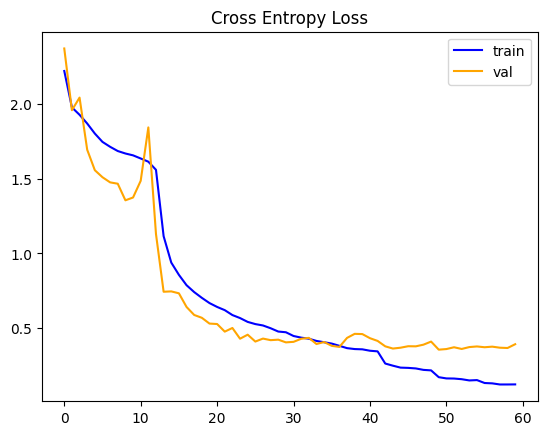

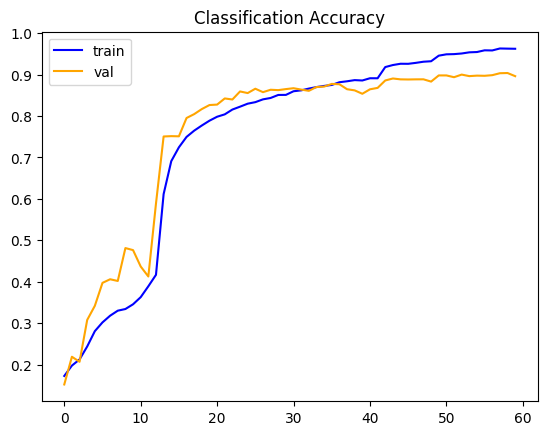

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

El coste podemos ver que es estable y es en el epoch 15 que se fija en un valor. Además la accuracy baila alrededor de 0.10. No se puede decir que sea un modelo muy bueno.

Veamos que tipo de predicciones estoy obteniendo sobre el conjunto de test (vamos a pintar las imagenes y sus clasificaciones)

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Una de las ventajas de Python es que hay montones de funciones y código realizado por terceras personas. Aquí me he fusilado unas bonitas funciones (que he adaptado un poco a mis necesidades) para poder pintar las imagenes, su label (ground truth) y las clasificaciones que hemos realizado.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Dibujamos las primeras imagenes, con las predicciones y sus valores reales (un total de 20 imagenes, para no abusar de vuestros laptops)

Coloreamos las prediciones correctas en azul y los fallos en rojo. Aunque primero he impreso las etiquetas para que tengamos una referencia al grafico.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck
[2.2637307e-05 1.8737074e-06 1.1147499e-04 9.9893159e-01 2.2491760e-04
 4.7534594e-04 1.4283715e-04 3.5353998e-05 1.2378707e-05 4.1618390e-05]
[2.6384338e-05 2.3227594e-04 3.4073182e-05 5.9833896e-05 2.4582188e-05
 3.3103315e-05 1.9119849e-05 2.9541896e-05 2.0905052e-05 9.9952018e-01]
[7.7746692e-05 6.0259939e-05 5.6087965e-04 4.4758484e-01 5.0845568e-04
 5.5043191e-01 1.3954104e-04 3.7587006e-04 1.1215260e-04 1.4827598e-04]
[2.1466067e-05 6.5894001e-06 2.3478967e-04 1.2641480e-04 7.8922691e-05
 4.7617923e-05 9.9946004e-01 8.9412915e-06 1.2860709e-05 2.3819655e-06]
[2.7924567e-05 3.9210808e-04 6.6796558e-05 1.2732983e-04 3.1632811e-05
 4.7767586e-05 2.6733342e-05 2.3555962e-05 2.4313424e-05 9.9923182e-01]
[6.96697913e-04 1.44810247e-05 1.39821125e-02 1.28930304e-04
 9.81675565e-01 1.98496506e-04 2.42695358e-04 3.00859706e-03
 2.96832532e-05 2.26996344e-05]
[2.3335675e-05 9.9975115e-01 2.8659824e-05 8.289068

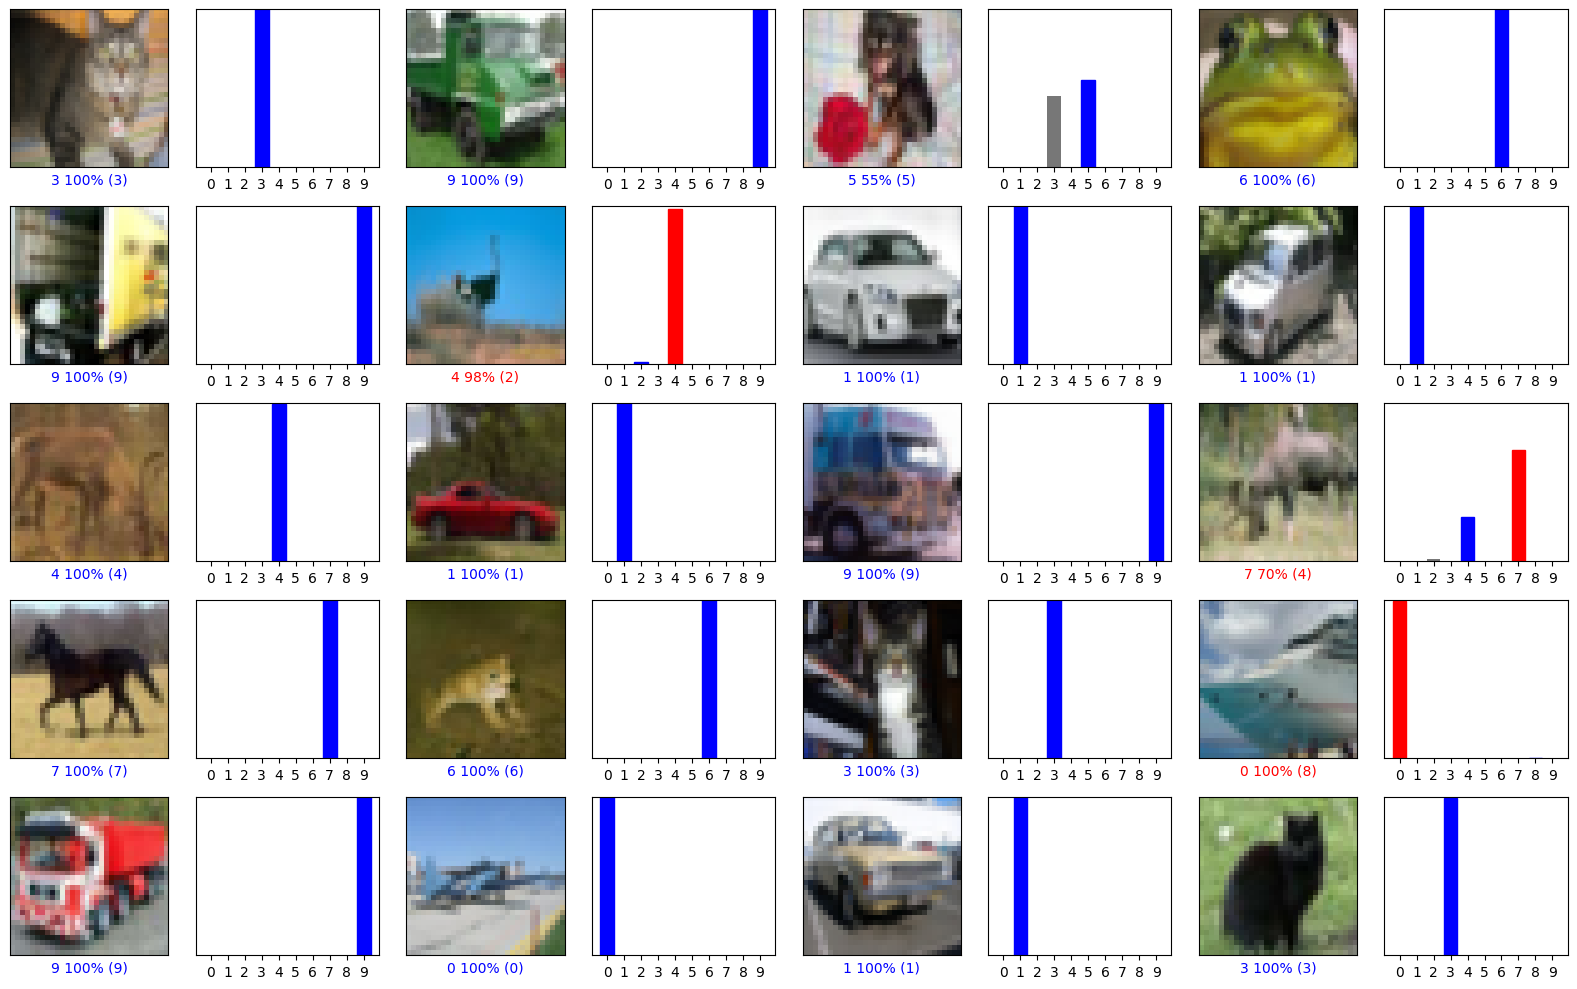

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  print(predictions[i+start],)
  plot_image(i+start, predictions[i+start], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. Guardamos el modelo para futuras evaluaciones

Id cambiando los nombres del archivo para ir guardando los diversos proyectos.
Aquí lo guardamos en "local", pero recordad que lo ideal es que lo guardeis en Google Drive (teneis que montar la unidad, fijar la ruta y allí guardar el modelo .h5)

In [ ]:
model.save('cifar10_best_def.keras')

In [ ]:
/content/cifar10_best_def.keras